In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
features = ['Card 1 Suit','Card 1 Rank','Card 2 Suit','Card 2 Rank','Card 3 Suit','Card 3 Rank','Card 4 Suit','Card 4 Rank','Card 5 Suit','Card 5 Rank','Poker Hand']
train_data = pd.read_csv('E:\Projects\Poker Hand Prediction using K-Mean clustering\poker-hand-training-true.data',sep = ',',names = features)
test_data = pd.read_csv('E:\Projects\Poker Hand Prediction using K-Mean clustering\poker-hand-testing.data',sep = ',',names = features)

In [3]:
pokerHandMap = {0: "Nothing in Hand",\
                1: "One pairs",\
                2: "Two pairs",\
                3: "Three of a kind",\
                4: "Straight",\
                5: "Flush",\
                6: "Full house",\
                7: "Four of a kind",\
                8: "Straight flush",\
                9: "Royal flush"
}
suitMap = {1: "Hearts", 2: "Spades", 3: "Diamonds", 4:"Clubs"}

data = pd.concat([train_data,test_data])

In [4]:
categoryVariableList = ['Card 1 Suit','Card 1 Rank','Card 2 Suit','Card 2 Rank','Card 3 Suit','Card 3 Rank','Card 4 Suit','Card 4 Rank','Card 5 Suit','Card 5 Rank','Poker Hand']
for var in categoryVariableList:
    data[var] = data[var].astype('float64')

In [5]:
prettyData = data
prettyData['Card 1 Suit'] = data['Card 1 Suit'].map(suitMap)
prettyData['Card 2 Suit'] = data['Card 2 Suit'].map(suitMap)
prettyData['Card 3 Suit'] = data['Card 3 Suit'].map(suitMap)
prettyData['Card 4 Suit'] = data['Card 4 Suit'].map(suitMap)
prettyData['Card 5 Suit'] = data['Card 5 Suit'].map(suitMap)
prettyData['Poker Hand'] = data['Poker Hand'].map(suitMap)

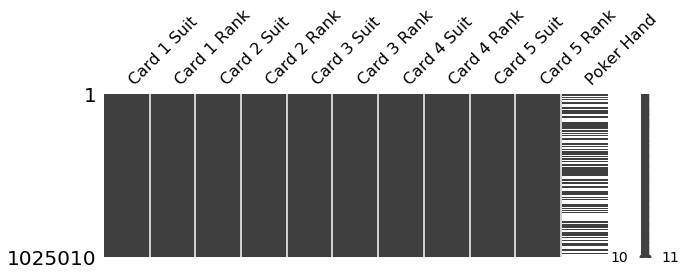

In [6]:
#Missing data detection
msno.matrix(data,figsize = (10,3))

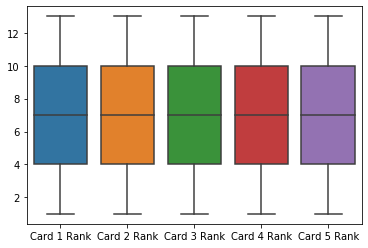

In [7]:
sn.boxplot(data=data, orient="v")

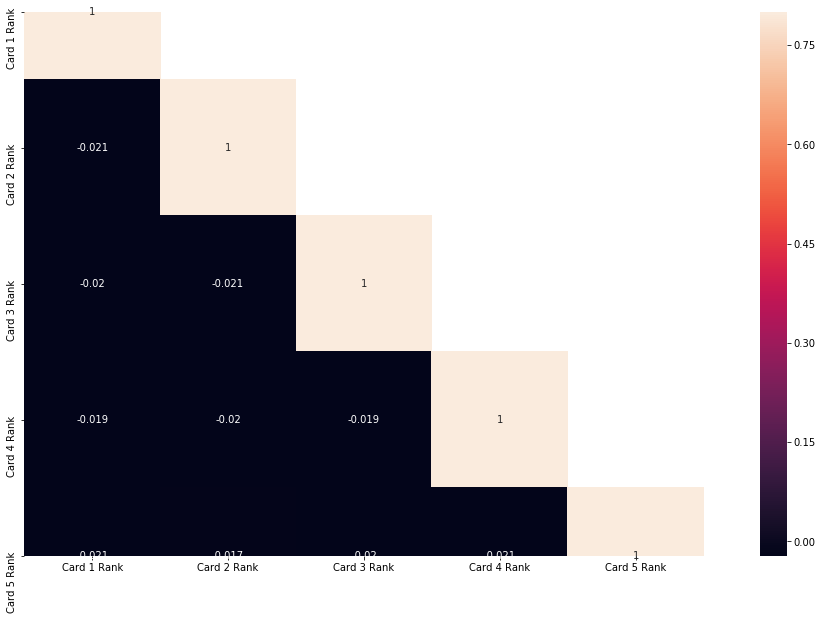

In [8]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)